In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
R910C_concat_summary = pd.read_csv("/data/jenuwein/processing/Pore-C-Snakemake/results/merged_contacts/NlaIII_R910C_GRCm38_unphased.concatemer_summary.csv")
R910C_concat_summary["enzyme"] = "R910C"
R91H_concat_summary = pd.read_csv("/data/jenuwein/processing/Pore-C-Snakemake/results/merged_contacts/NlaIII_R91H_GRCm38_unphased.concatemer_summary.csv")
R91H_concat_summary["enzyme"] = "R91H"
R93D_concat_summary = pd.read_csv("/data/jenuwein/processing/Pore-C-Snakemake/results/merged_contacts/NlaIII_R93D_GRCm38_unphased.concatemer_summary.csv")
R93D_concat_summary["enzyme"] = "R93D"
WT_concat_summary = pd.read_csv("/data/jenuwein/processing/Pore-C-Snakemake/results/merged_contacts/NlaIII_WT_GRCm38_unphased.concatemer_summary.csv")
WT_concat_summary["enzyme"] = "WT"

In [7]:
concat_summary = pd.concat([R910C_concat_summary, R91H_concat_summary, R93D_concat_summary, WT_concat_summary], ignore_index=True)

In [8]:
# reformat the levels to include enzyme when there is nothing left
def _reformat(row):
    row = row.copy()
    if pd.isna(row["level_0"]):
        to_assign = row["enzyme"]
    else:
        to_assign = row["level_0"] + ", " + row["enzyme"]
    row["level_0"] = to_assign
    return row

new_df = concat_summary.apply(_reformat, axis=1)
new_df.head()

,section,level_0,level_1,level_2,value,enzyme
0,user_metadata,R910C,NaN,run_id,R910C,R910C
1,user_metadata,R910C,NaN,enzyme,NlaIII,R910C
2,user_metadata,R910C,NaN,biospecimen,R910C_rep1,R910C
3,user_metadata,R910C,NaN,refgenome_id,GRCm38,R910C
4,user_metadata,R910C,NaN,phase_set_id,unphased,R910C


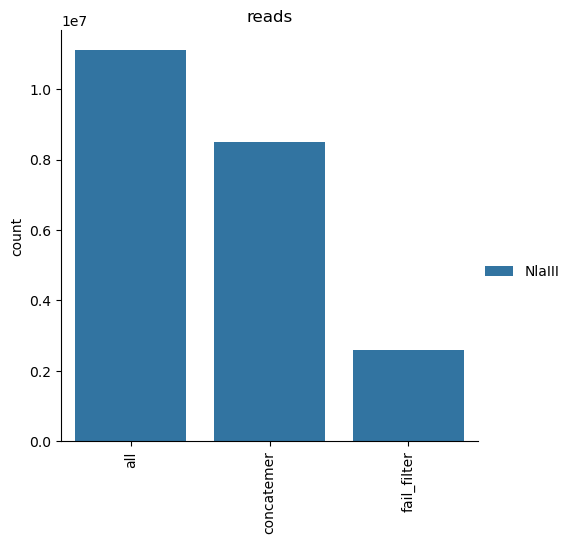

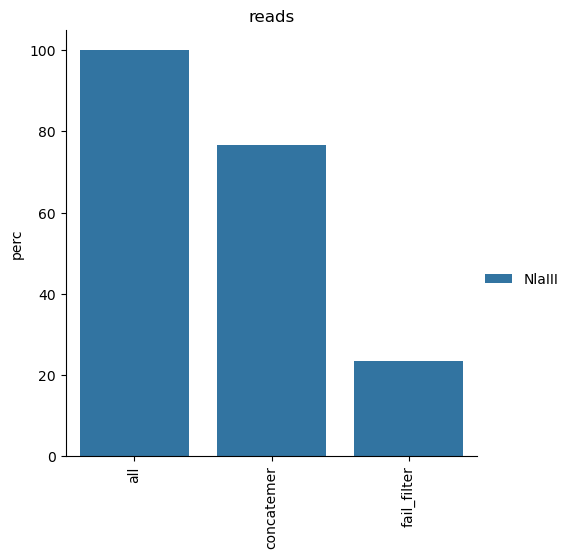

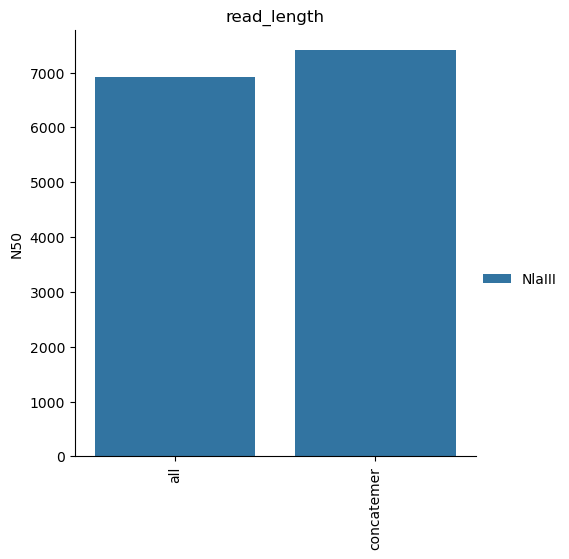

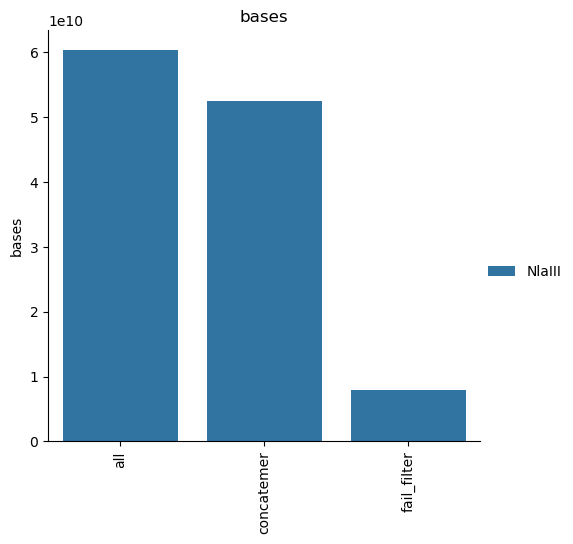

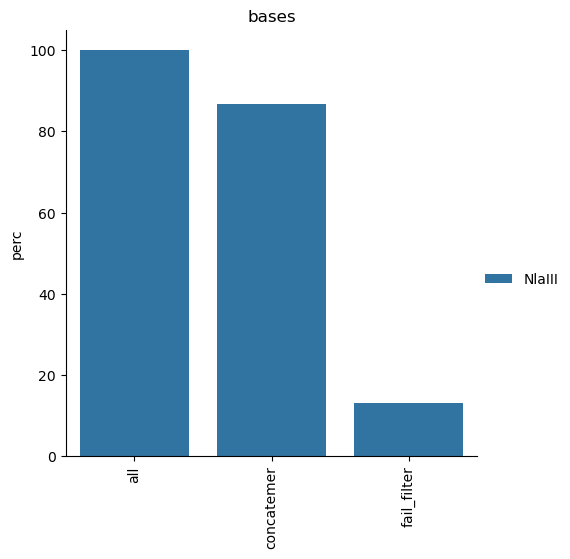

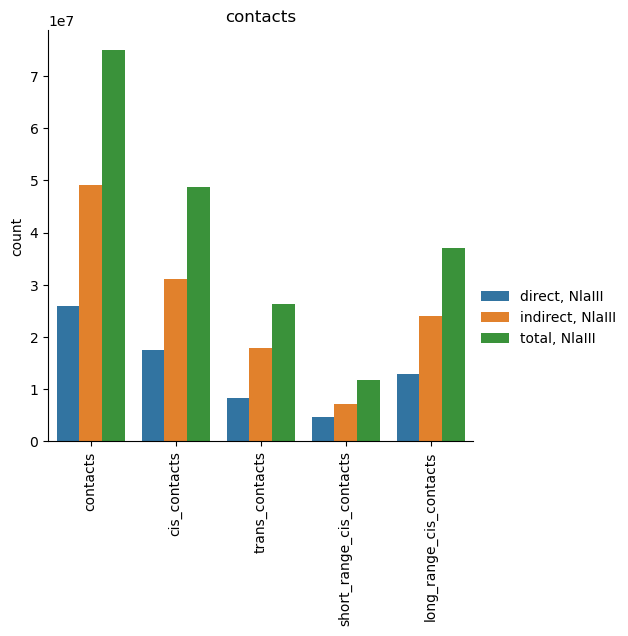

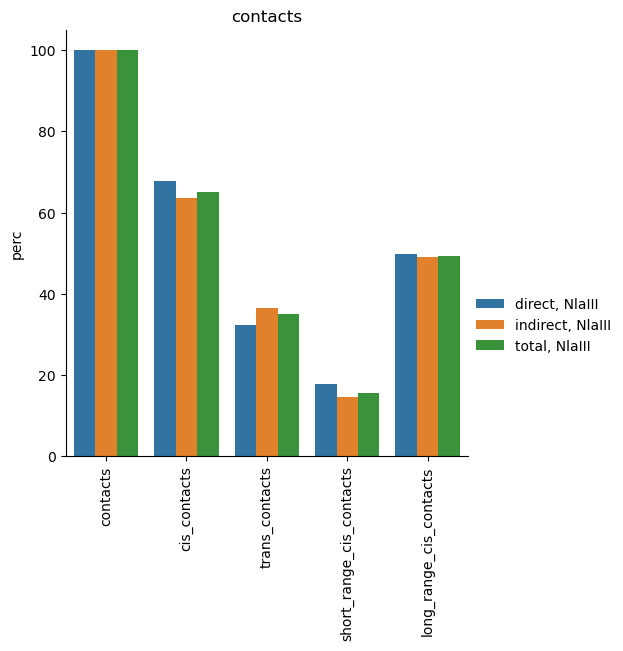

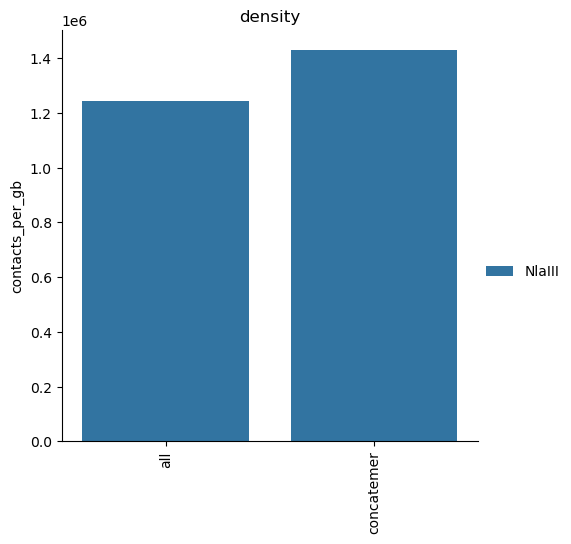

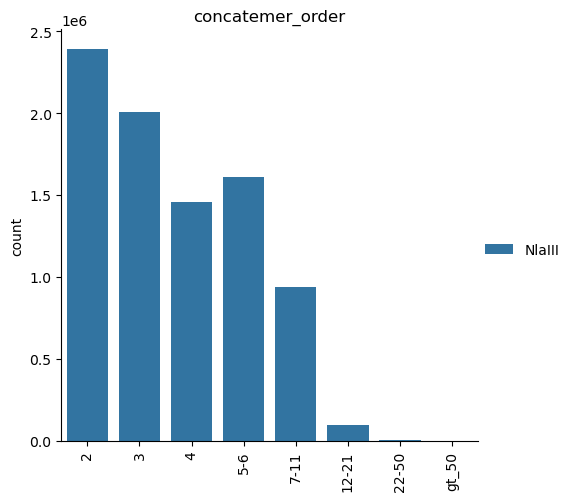

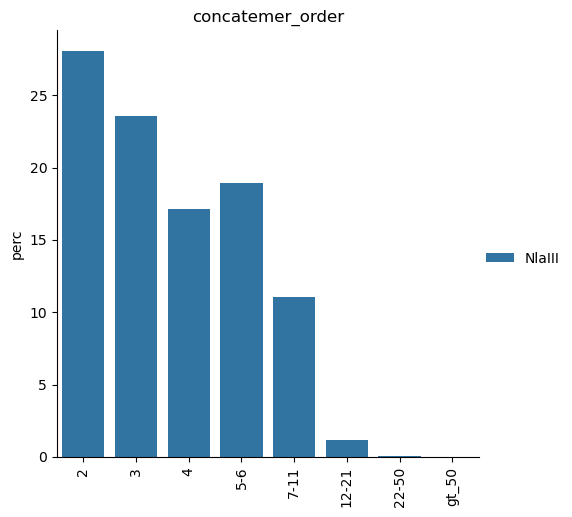

,section,level_0,level_1,level_2,value,enzyme
59,concatemer_order,NlaIII,perc,2,28.093628,NlaIII
60,concatemer_order,NlaIII,perc,3,23.567195,NlaIII
61,concatemer_order,NlaIII,perc,4,17.134848,NlaIII
62,concatemer_order,NlaIII,perc,5-6,18.950731,NlaIII
63,concatemer_order,NlaIII,perc,7-11,11.030804,NlaIII


In [11]:
for section in new_df["section"].unique():
    if section == "user_metadata":
        continue
    summary = new_df[new_df["section"] == section]
    for level_1 in summary["level_1"].unique():
        sub_df = summary[summary["level_1"] == level_1]
        # print(sub_df)
        sub_df = sub_df.assign(value=sub_df["value"].astype(float))
        g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", errorbar=None, data=sub_df)
        plt.xticks(rotation=90)
        plt.title(section)
        plt.ylabel(level_1)
        plt.xlabel(None)
        g._legend.set_title("")
        plt.show()
sub_df.head()

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


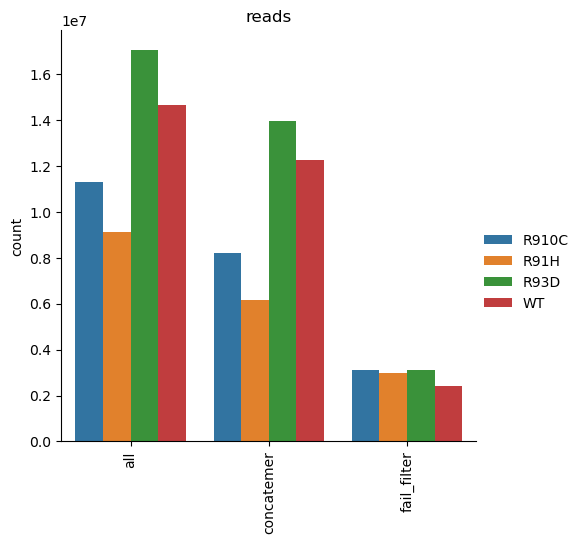

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


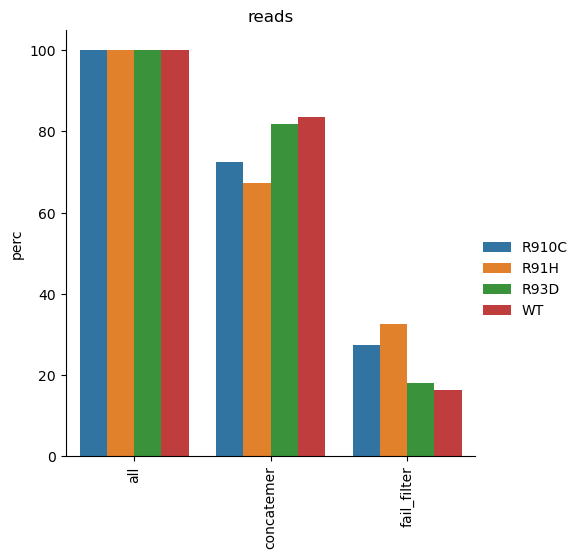

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


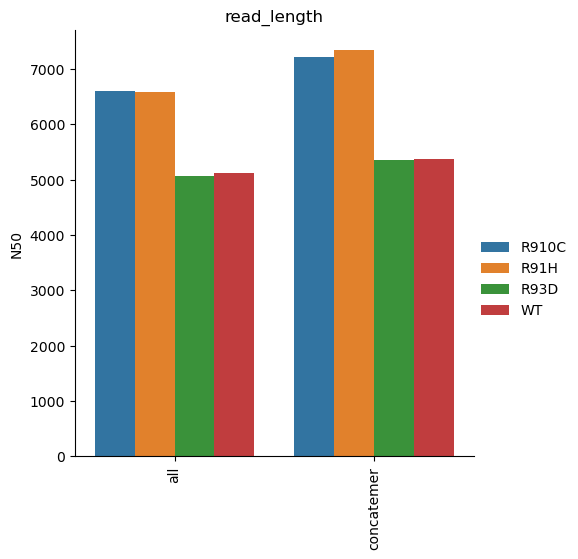

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


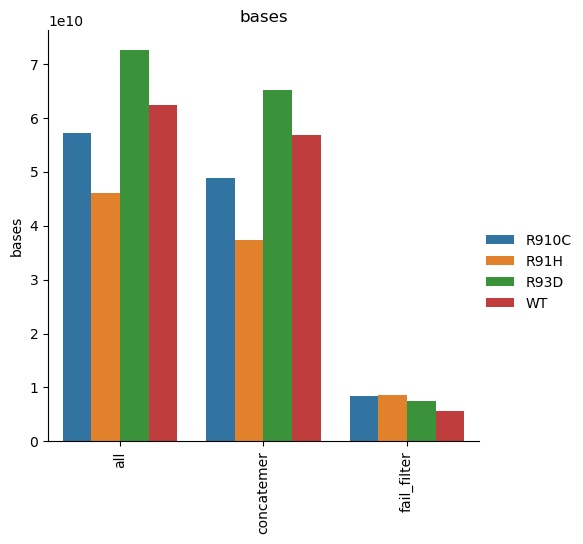

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


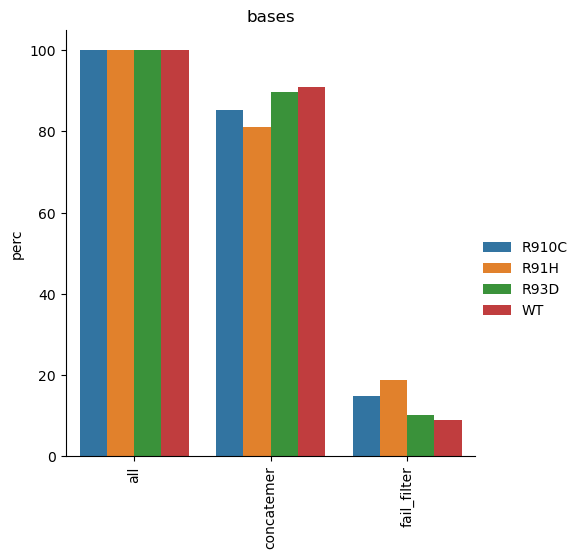

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


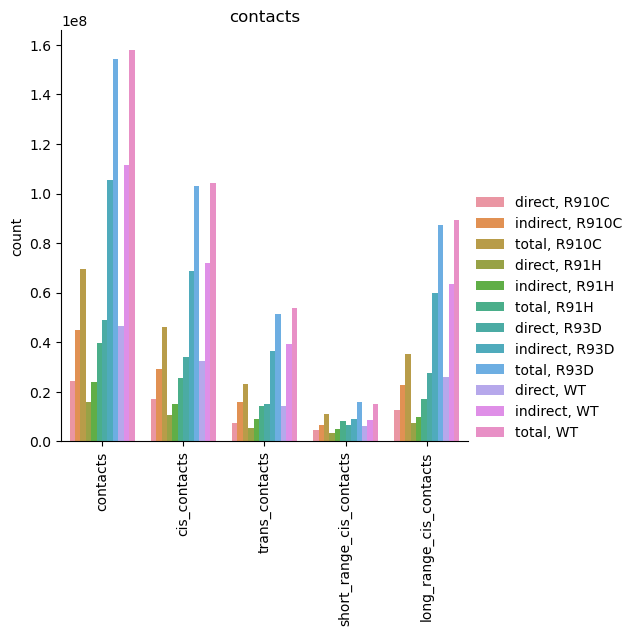

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


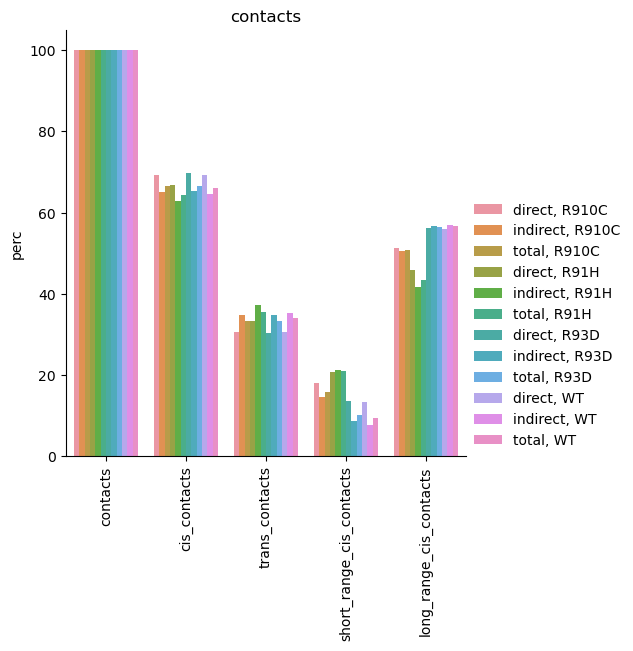

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


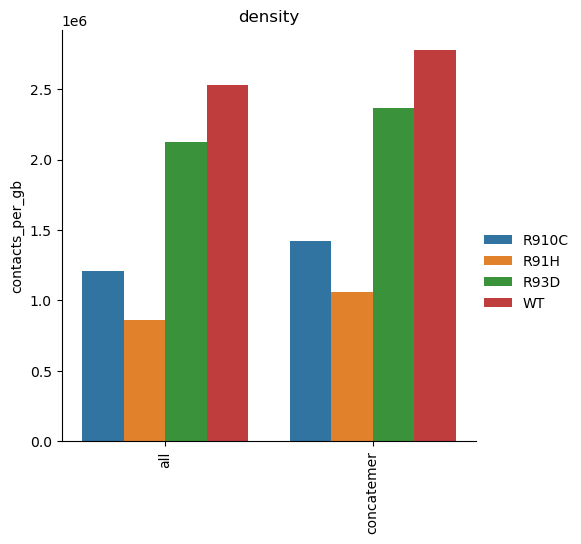

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


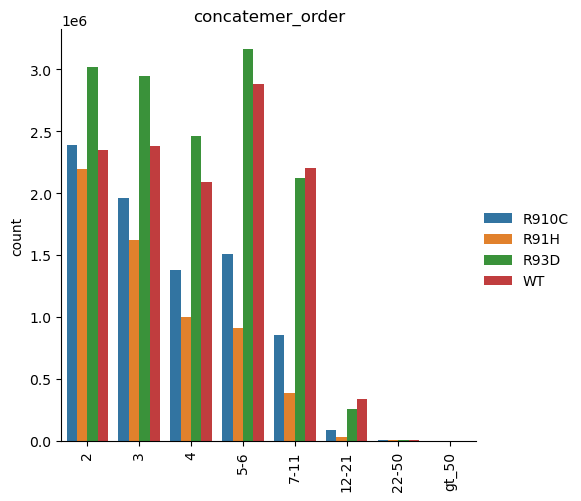

/tmp/ipykernel_178163/3753134577.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)


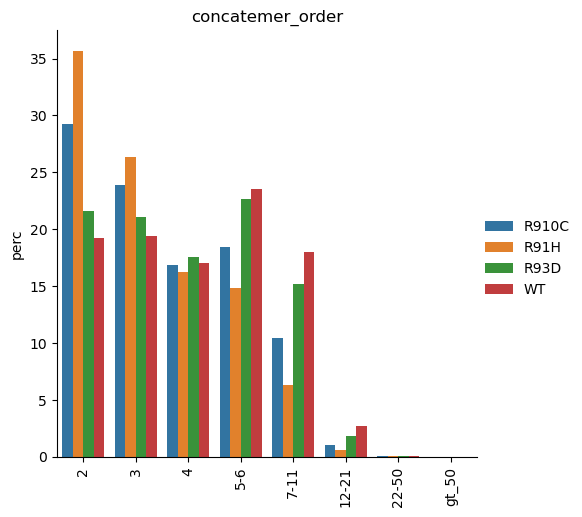

In [9]:
for section in new_df["section"].unique():
    if section == "user_metadata":
        continue
    summary = new_df[new_df["section"] == section]
    for level_1 in summary["level_1"].unique():
        sub_df = summary[summary["level_1"] == level_1]
        # print(sub_df)
        sub_df = sub_df.assign(value=sub_df["value"].astype(float))
        g = sns.catplot(x="level_2", y="value", kind="bar", hue="level_0", ci=None, data=sub_df)
        plt.xticks(rotation=90)
        plt.title(section)
        plt.ylabel(level_1)
        plt.xlabel(None)
        g._legend.set_title("")
        plt.show()